# Iterative reconstruction using SART

Reconstruct an image from the radon transform, using a single iteration of the Simultaneous Algebraic Reconstruction Technique (SART) algorithm.

https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html

Algebraic reconstruction techniques for tomography are based on a straightforward idea: for a pixelated image the value of a single ray in a particular projection is simply a sum of all the pixels the ray passes through on its way through the object. This is a way of expressing the forward Radon transform. The inverse Radon transform can then be formulated as a (large) set of linear equations. As each ray passes through a small fraction of the pixels in the image, this set of equations is sparse, allowing iterative solvers for sparse linear systems to tackle the system of equations. One iterative method has been particularly popular, namely Kaczmarz’ method [3], which has the property that the solution will approach a least-squares solution of the equation set.

The combination of the formulation of the reconstruction problem as a set of linear equations and an iterative solver makes algebraic techniques relatively flexible, hence some forms of prior knowledge can be incorporated with relative ease.

# Итеративная реконструкция с использованием алгоритма SART

Восстановление изображения с помощью преобразования Радона, используя одну итерацию алгоритма одновременной алгебраической реконструкции (SART).

https://scikit-image.org/docs/stable/auto_examples/transform/plot_radon_transform.html

Алгебраические методы реконструкции для томографии основаны на простой идее: для пикселизированного изображения значение одного луча в конкретной проекции — это просто сумма всех пикселей, через которые проходит луч на своем пути через объект. Это способ выражения прямого преобразования Радона. Обратное преобразование Радона затем можно сформулировать как (большой) набор линейных уравнений. Поскольку каждый луч проходит через небольшую часть пикселей на изображении, этот набор уравнений является разреженным, что позволяет итеративным решателям для разреженных линейных систем решать систему уравнений. Один итерационный метод был особенно популярен, а именно метод Качмажа [3], который обладает тем свойством, что решение будет приближаться к решению наименьших квадратов набора уравнений.

Сочетание формулировки задачи реконструкции как набора линейных уравнений и итеративного решателя делает алгебраические методы относительно гибкими, поэтому некоторые формы предшествующих знаний могут быть включены с относительной легкостью.

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject.



The reason is that pandas defines its numpy dependency freely as "anything newer than certain version of numpy". The problem occured, when numpy==2.0.0 has been released on June 16th 2024, because it is no longer compatible with your pandas version.

The solution is to pin down the numpy version to any before the 2.0.0. Today it could be (this is the most recent numpy 1 release):
```
pip install numpy==1.24.1
This will also work pip install numpy==1.26.4
pip install "numpy<2"
```

(Uninstall newish Numpy)

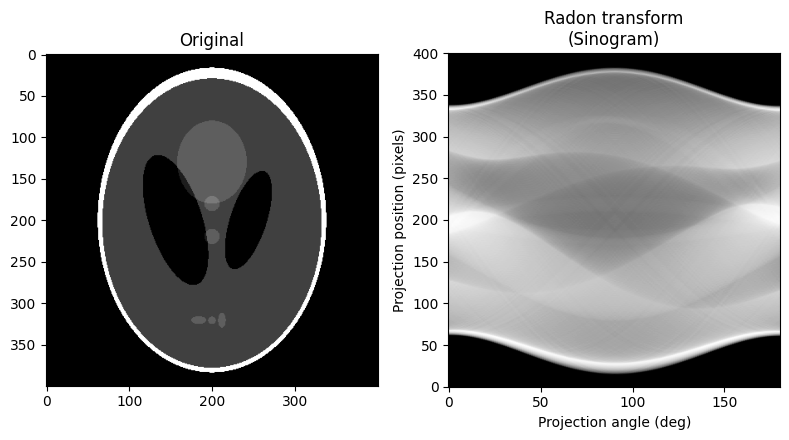

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale


image = shepp_logan_phantom()
#image = rescale(image, scale=0.4, mode='reflect', channel_axis=None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

projections = 180
theta = np.linspace(0.0, 180.0, projections, endpoint=False)
sinogram = radon(image, theta=theta)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

SART (1 iteration) rms reconstruction error: 0.0476
Calculated time: 2.98 s
SART (2 iterations) rms reconstruction error: 0.0384


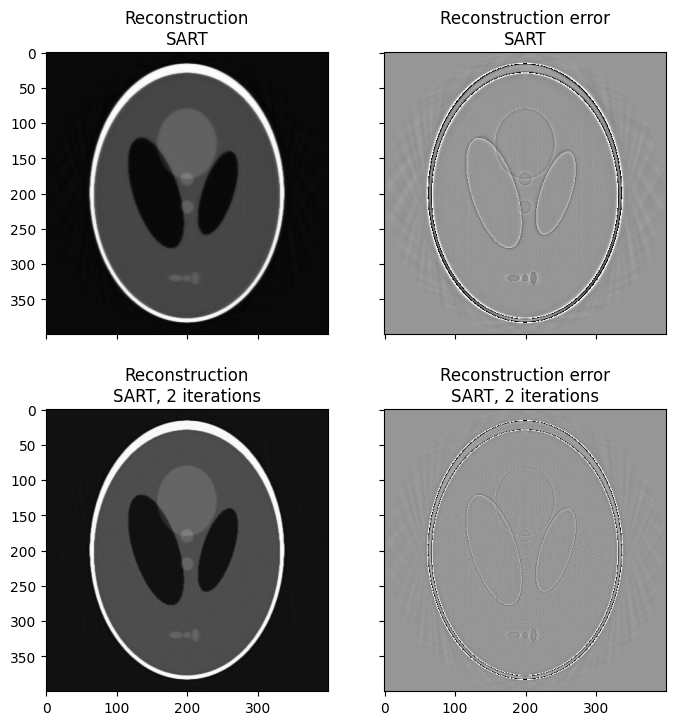

In [2]:
imkwargs = dict(vmin=-0.2, vmax=0.2)

from skimage.transform import iradon_sart 
import time 

start=time.time()
reconstruction_sart = iradon_sart(sinogram, theta=theta)
end=time.time()-start

error = reconstruction_sart - image
print(f'SART (1 iteration) rms reconstruction error: '
      f'{np.sqrt(np.mean(error**2)):.3g}')
print(f'Calculated time: {end:.3g} s')

fig, axes = plt.subplots(2, 2, figsize=(8, 8.5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title("Reconstruction\nSART")
ax[0].imshow(reconstruction_sart, cmap=plt.cm.Greys_r)

ax[1].set_title("Reconstruction error\nSART")
ax[1].imshow(reconstruction_sart - image, cmap=plt.cm.Greys_r, **imkwargs)

# Run a second iteration of SART by supplying the reconstruction
# from the first iteration as an initial estimate
reconstruction_sart2 = iradon_sart(sinogram, theta=theta,
                                   image=reconstruction_sart)
error = reconstruction_sart2 - image
print(f'SART (2 iterations) rms reconstruction error: '
      f'{np.sqrt(np.mean(error**2)):.3g}')

ax[2].set_title("Reconstruction\nSART, 2 iterations")
ax[2].imshow(reconstruction_sart2, cmap=plt.cm.Greys_r)

ax[3].set_title("Reconstruction error\nSART, 2 iterations")
ax[3].imshow(reconstruction_sart2 - image, cmap=plt.cm.Greys_r, **imkwargs)
plt.show()

Заметим что результат преобразования нормировать для сравнения не потребовалось, тк алгоритм предполагает решение системы линейных уравнений, и масштаб относительно исходного диапазона \[0,1\] сохраняется:

In [3]:
print(np.min(reconstruction_sart), np.max(reconstruction_sart))

-0.06814090866543666 1.0617653920373513


# Reconctruction using MLEM


Simple PYTHON code for iterative image reconstruction 
https://www.youtube.com/watch?v=IhETD4nSJec

Simple interative image reconstruction algorithm ML-EM (maximum likehood - expectation maximisation)

The well-studied maximum likelihood expectation maximization (ML-EM) algorithms have been found to produce very good results in applications. But, it requires a large number of iterations, resulting in the delays of the availability of reconstructed images. One of the main reasons for this is that EM algorithms have very slow convergence and thus a large number of iterations may be required to achieve an acceptable reconstructed image. Several modifications have been suggested to accelerate the convergence of these algorithms 

# Реконструкция с использованием алгоритма MLEM

Простой код PYTHON для итеративной реконструкции изображений
https://www.youtube.com/watch?v=IhETD4nSJec

Простой интерактивный алгоритм реконструкции изображений ML-EM (максимальное сходство - максимизация ожидания)

Хорошо изученные алгоритмы максимизации ожидания максимального правдоподобия (ML-EM) дают очень хорошие результаты в приложениях. Но для этого требуется большое количество итераций, что приводит к задержкам доступности реконструированных изображений. Одной из основных причин этого является то, что алгоритмы EM имеют очень медленную сходимость, и поэтому для получения приемлемого реконструированного изображения может потребоваться большое количество итераций. Было предложено несколько модификаций для ускорения сходимости этих алгоритмов

(Maximum-Likelihood Expectation-Maximization Algorithm Versus Windowed Filtered Backprojection Algorithm: A Case Study. Gengsheng L. Zeng. Journal of Nuclear Medicine Technology June 2018, 46 (2) 129-132; DOI: https://doi.org/10.2967/jnmt.117.196311 )

Calculated time: 23.6 s
FBP rms reconstruction error: 0.00885


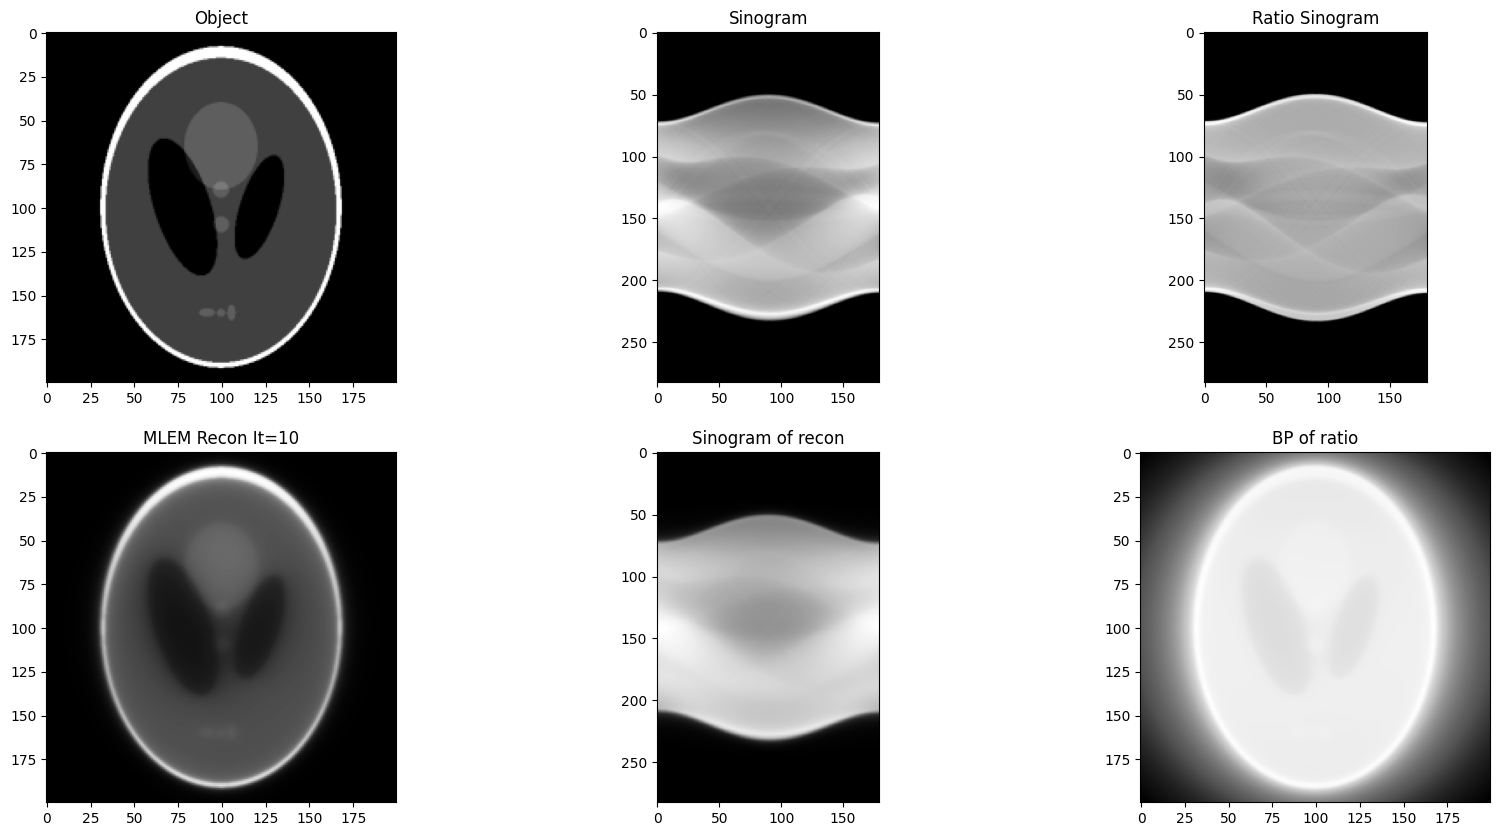

In [4]:
from skimage.data import shepp_logan_phantom # pip install scikit-image
from skimage.transform import radon, iradon, rescale

import numpy as np
import matplotlib.pyplot as plt

import time 

from IPython.display import display, clear_output # for Notebook only

#plt.ion() for *.py only
activity_level = 0.1
true_object = shepp_logan_phantom()
true_object = rescale(activity_level * true_object, 0.5
)
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].imshow(true_object, cmap='Greys_r')
axs[0, 0].set_title('Object')

# Generate simulated sinogram data
projections = 180
azi_angles = np.linspace(0.0, 180.0, projections, endpoint=False)
sinogram = radon(true_object, azi_angles, circle=False)

axs[0, 1].imshow(sinogram, cmap='Greys_r')
axs[0, 1].set_title('Sinogram')

mlem_rec = np.ones(true_object.shape) # iteration 0 (k = 0)
sino_ones = np.ones(sinogram.shape)

start=time.time()

sens_image = iradon(sino_ones, azi_angles, circle=False, filter_name=None)
for iter in range(10):

    fp = radon(mlem_rec, azi_angles, circle=False) # Forward projection of mlem_rec at id
    ratio = sinogram / (fp + 0.0000001) # To prevent division by zero
    correction = iradon(ratio, azi_angles, circle=False, filter_name=None) / sens_image

    axs[1, 0].imshow(mlem_rec, cmap='Greys_r')
    axs[1, 0].set_title('MLEM recon')
    axs[1, 1].imshow(fp, cmap='Greys_r')
    axs[1, 1].set_title('Sinogram of recon')
    axs[0, 2].imshow(ratio, cmap='Greys_r')
    axs[0, 2].set_title('Ratio Sinogram')
    axs[1, 2].imshow(correction, cmap='Greys_r')
    axs[1, 2].set_title('BP of ratio')

    mlem_rec = mlem_rec * correction
    axs[1, 0].imshow(mlem_rec, cmap='Greys_r')
    axs[1, 0].set_title(f'MLEM Recon It={iter+1}')
    display(fig)
    clear_output(wait=True)
    #plt.pause(0.5)

end = time.time() - start
print(f'Calculated time: {end:.3g} s')

error = mlem_rec - true_object
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

#plt.show(block=True)
